In [46]:
from __future__ import print_function
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
pd.pandas.set_option('display.max_columns', None)
#pip install --upgrade gensim
import json
import operator
import collections
import re
import numpy as np
import pandas as pd
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

#  Ingredients

In [47]:
train_dataset = json.load(open('train.json','r'))
test_dataset = json.load(open('test.json','r'))

In [48]:
train_dataset[285]

{'id': 45423,
 'cuisine': 'italian',
 'ingredients': ['(    oz.) tomato sauce',
  'ground veal',
  'sliced mushrooms',
  'italian seasoning mix',
  'finely chopped onion',
  'dry bread crumbs',
  'spaghetti',
  'beef',
  'diced tomatoes',
  'fresh basil leaves',
  'parmesan cheese',
  'large eggs',
  'fat skimmed chicken broth']}

In [49]:
train_dataset[285]['ingredients']

['(    oz.) tomato sauce',
 'ground veal',
 'sliced mushrooms',
 'italian seasoning mix',
 'finely chopped onion',
 'dry bread crumbs',
 'spaghetti',
 'beef',
 'diced tomatoes',
 'fresh basil leaves',
 'parmesan cheese',
 'large eggs',
 'fat skimmed chicken broth']

In [50]:
ingredients = list()

for recipe in train_dataset:
    for ingredient in recipe[u'ingredients']:
        ingredients.append(ingredient.strip())

cuisines = list()
for recipe in train_dataset:
    cuisines.append(recipe[u'cuisine'].strip())

In [51]:
print("Total Cusines: ", len(cuisines))

Total Cusines:  39774


In [52]:
print("Total Ingredients: ", len(ingredients))

Total Ingredients:  428275


In [53]:
ingredients[91]

'olive oil'

In [54]:
print('unique ingredients in the dataset: ',len(set(ingredients)))

unique ingredients in the dataset:  6714


In [55]:
# using Counter to get frequencies 
ingredients_count = collections.Counter(ingredients)
cuisines_count = collections.Counter(cuisines)

In [56]:
ingredients_count['baking powder']

1738

In [57]:
cuisines_count['indian']

3003

In [58]:
cuisines_count.most_common(10)

[('italian', 7838),
 ('mexican', 6438),
 ('southern_us', 4320),
 ('indian', 3003),
 ('chinese', 2673),
 ('french', 2646),
 ('cajun_creole', 1546),
 ('thai', 1539),
 ('japanese', 1423),
 ('greek', 1175)]

print(np.mean(list(counts_cuis.values())))
print(np.std(list(counts_cuis.values())))

x_cu = [cu for cu, frq in counts_cuis.most_common()]
y_frq = [frq for cu, frq in counts_cuis.most_common()]
fbar = sns.barplot(x = x_cu, y = y_frq)
for item in fbar.get_xticklabels():
    item.set_rotation(90)

symbols = list()

for recipt in trainrecipts:
    #print(recipt)
    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        if re.match("\(|@|\$\?", ingredient.lower()):
            print(ingredient)
            symbols.append(ingredient)
len(symbols)
counts_symbols = collections.Counter(symbols)
counts_symbols.most_common(20)

In [59]:
import inflect
stemmer = inflect.engine()

recipes_as_sentences_list = list()

for recipe in train_dataset:
    clean_recipe = list()
    for ingredient in recipe['ingredients']:
        ingredient = re.sub(r'[^a-zA-Z\s]+', '', ingredient)
        ingredient =  re.sub(r'\(.*oz.\)|large|medium|small|warm|plain|crushed|crumbles|ground|minced|||chopped|sliced','', ingredient)
        if stemmer.singular_noun(ingredient) is not False:
            ingredient = stemmer.singular_noun(ingredient)
        words_in_ingredients = nltk.tag.pos_tag(ingredient.split())
        words_in_ingredients=[word[0] for word in words_in_ingredients if word[1] in ('NN')]
        ingredient = " ".join(words_in_ingredients)
        ingredient = ingredient.strip().lower()
        clean_recipe.append(ingredient)
    while("" in clean_recipe) :
        clean_recipe.remove("")
    recipes_as_sentences_list.append(clean_recipe)

In [60]:
#print(len(recipes_as_sentences_list))
print(recipes_as_sentences_list[12342])

"""
a = ['', 'pepper', 'salt', 'tomato', 'pepper', 'thyme', 'egg', 'tomato', 'corn meal', 'milk', 'oil']

while("" in a) : 
    a.remove("") 
print(a)
"""
train_dataset[12342]

['soy sauce', 'shrimp', 'brown sugar', 'onion', 'chicken stock', 'ginger root', 'boneless pork loin', 'rice wine', 'wonton wrapper']


{'id': 46629,
 'cuisine': 'chinese',
 'ingredients': ['light soy sauce',
  'peeled shrimp',
  'brown sugar',
  'green onions',
  'chicken stock',
  'fresh ginger root',
  'boneless pork loin',
  'chinese rice wine',
  'wonton wrappers']}

#nltk.download('averaged_perceptron_tagger')
a = nltk.tag.pos_tag("boneless chicken".split())

words=[ele[0] for ele in a if ele[1] in ('NN')]
" ".join(words)

words_in_ingredients = nltk.tag.pos_tag("boneless chickens".split())
words_in_ingredients=[word[0] for word in words_in_ingredients if word[1] in ('NN')]
ingredient = " ".join(words_in_ingredients)
ingredient


words_in_ingredients = nltk.tag.pos_tag("boneless chicken".split())
words_in_ingredients=[word[0] for word in words_in_ingredients if word[1] in ('NN')]
ingredient = " ".join(words_in_ingredients)
print(ingredient)

words_in_ingredients = nltk.tag.pos_tag("Google".split())
print(words_in_ingredients)
words_in_ingredients=[word[0] for word in words_in_ingredients if word[1] in ('NN')]
ingredient = " ".join(words_in_ingredients)
print(ingredient)


words_in_ingredients = nltk.tag.pos_tag("warm water".split())
print(words_in_ingredients)
words_in_ingredients=[word[0] for word in words_in_ingredients if word[1] in ('NN')]
ingredient = " ".join(words_in_ingredients)
print(ingredient)

import nltk
a = ['salts','oils', 'garlic cloves', 'shoes', 'cloves', 'boneless chickens', 'knives','spinach leaves']
p = nltk.PorterStemmer()
a = [p.stem(word) for word in a]
print(a)

ingredient = stemmer.singular_noun("cherry tomatoes")
print((ingredient))
print(type(ingredient))

In [67]:
num_features = 30    # Word vector dimensionality                      
min_word_count = 3    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size;                                                                                
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(recipes_as_sentences_list, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
#model.init_sims(replace=True)

In [68]:
model.most_similar(u'milk')

[('half half', 0.8344869613647461),
 ('margarine', 0.8126591444015503),
 ('pie crust', 0.7757635712623596),
 ('biscuit', 0.768205463886261),
 ('cornbread mix', 0.7390078902244568),
 ('pastry dough', 0.7341731190681458),
 ('cherry pie filling', 0.7323823571205139),
 ('shortening', 0.7310898900032043),
 ('apple pie', 0.728115439414978),
 ('crust pie', 0.7261394262313843)]

In [69]:
#model.most_similar("falafel")

In [70]:
model.similarity('ginger root', 'ginger')

0.91929847

In [20]:
model.similarity("sea salt", "kosher salt")

0.8968209

In [21]:
model.similarity("ginger", "milk")

-0.15784855

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
sea_salt = model.wv['sea salt']
kosher_salt = model.wv['kosher salt']
value = cosine_similarity([sea_salt], [kosher_salt])
print(str(value[0]))

[0.8659956]


In [72]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    i = 0
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        if i == 65:
            break
        i +=1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

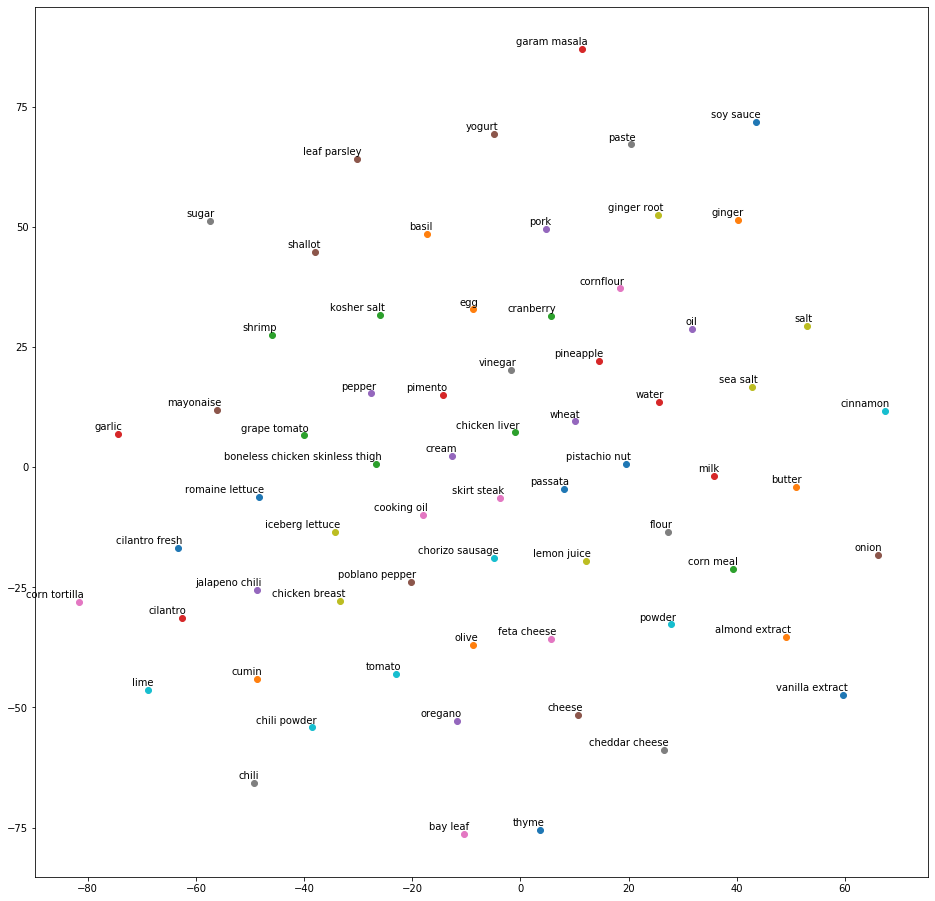

In [24]:
tsne_plot(model)

In [25]:
print(model.wv.vectors.shape)
vocab = model.wv.vocab

(2513, 30)


In [26]:
print(type(vocab))
#vocab.keys()

<class 'dict'>


dict_keys(['romaine lettuce', 'olive', 'grape tomato', 'garlic', 'pepper', 'onion', 'feta cheese', 'flour', 'salt', 'tomato', 'thyme', 'egg', 'corn meal', 'milk', 'oil', 'mayonaise', 'cooking oil', 'chili', 'chicken breast', 'powder', 'soy sauce', 'butter', 'chicken liver', 'water', 'wheat', 'shallot', 'cornflour', 'paste', 'lemon juice', 'chili powder', 'passata', 'cumin', 'boneless chicken skinless thigh', 'garam masala', 'cream', 'yogurt', 'bay leaf', 'sugar', 'ginger root', 'cinnamon', 'vanilla extract', 'ginger', 'shrimp', 'cilantro', 'jalapeno chili', 'leaf parsley', 'skirt steak', 'vinegar', 'sea salt', 'chorizo sausage', 'pistachio nut', 'almond extract', 'cranberry', 'pineapple', 'pork', 'poblano pepper', 'corn tortilla', 'cheddar cheese', 'iceberg lettuce', 'lime', 'cilantro fresh', 'basil', 'kosher salt', 'pimento', 'oregano', 'cheese', 'provolone cheese', 'canola oil', 'mushroom', 'sausage', 'sodium soy sauce', 'mustard', 'bean', 'sesame oil', 'scallion', 'wine', 'turkey', 

In [79]:
ingredients = list()

for recipe in recipes_as_sentences_list:
    for ingredient in recipe:
        ingredients.append(ingredient.strip())

In [80]:
print(len((ingredients)))
ingredients_set = set(ingredients)
print(len((ingredients_set)))

417044
3940


In [81]:
unknown_ingredients = []
for ingredient in ingredients_set:
    if ingredient not in vocab.keys():
        unknown_ingredients.append(ingredient)

In [87]:
print(len(unknown_ingredients))
print(unknown_ingredients)

1427
['ciabatta bun', 'curry mix', 'bulb fennel', 'yogurt cheese', 'yoplait', 'beef carpaccio', 'light tuna', 'pasta wagon wheel', 'lipton pure leaf tea', 'asakusa', 'skin bone chicken legs', 'conchiglie', 'sesameginger', 'broiler chicken', 'banana cream pudding', 'orange blossom extract', 'seville orange juice', 'amba', 'steelcut oatmeal', 'gravenstein apple', 'sodium parmesan cheese', 'fryer', 'hip tea bag', 'carpaccio', 'cremini', 'peapod', 'energy drink', 'rasher', 'masala mix', 'corn bread crumb', 'wine vinaigrette', 'fructose', 'water cracker', 'pork tongue', 'semi farro', 'beef bouillon powder', 'mexico chile pod', 'veggie patty', 'gram dal', 'loofah', 'pane', 'lime beverage', 'swanson chicken stock', 'jamon serrano', 'biscuit crumb', 'tiger', 'ginseng tea', 'gomashio', 'bone marrow', 'prosciutto fat', 'efu noodl', 'vanilla glaze', 'jambalaya', 'sodium cajun', 'pignoli', 'lamb stew', 'mi', 'riblet', 'soy marinade', 'chocolate fudge ice cream', 'celery flake', 'grind cornmeal', '

In [83]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    sent = [x for x in sent if x not in unknown_ingredients]
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return np.asarray(sent_vec) / numw

In [84]:
X=[]
for sentence in recipes_as_sentences_list:
    X.append(sent_vectorizer(sentence, model))

In [86]:

print(X[0])
print(recipes_as_sentences_list[0])

[-0.26349393 -0.16761073 -0.05869535  0.7978508   0.9224189  -0.55868167
  0.17583182  0.22203551 -0.2973937   0.6896577   0.6070237   0.02418105
  0.85137    -0.98156637 -1.1651636   0.26636094 -0.5029144   0.2834668
  0.59525347  0.7116483   0.5111393   1.6174906   0.19029103  0.68305105
  2.1771398  -0.23920582 -0.6600042   0.58999014  0.3140237   0.9442403 ]
['romaine lettuce', 'olive', 'grape tomato', 'garlic', 'pepper', 'onion', 'feta cheese']


In [34]:
from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=20
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
"""
for index, sentence in enumerate(sentences):
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
"""

ValueError: shapes (0,) and (30,) not aligned: 0 (dim 0) != 30 (dim 0)

In [41]:
from sklearn import cluster
from sklearn import metrics


num_features = 30    # Word vector dimensionality                      
min_word_count = 1    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size;                                                                                
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model
"""
model = word2vec.Word2Vec(recipes_as_sentences_list, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)
"""
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
#model.init_sims(replace=True)
model1 = word2vec.Word2Vec(recipes_as_sentences_list, size=num_features, min_count=1)
 
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    sent = [x for x in sent if x not in unknown_ingredients]
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return np.asarray(sent_vec) / numw
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model1))   
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,  avoid_empty_clusters=True, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  

KeyboardInterrupt: 

In [ ]:
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
  

model = Word2Vec(sentences, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return np.asarray(sent_vec) / numw
  
  
X1=[]
for sentence in sentences:
    X1.append(sent_vectorizer(sentence, model))

# note with some version you would need use this (without wv) 
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X1, assign_clusters=True)

In [ ]:
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))